# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 98100561
full_name = 'Soheil Homayoonfard'
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
data = pd.read_csv('nutrition.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
numeric_data = data.select_dtypes(include=[float, int]).drop(columns=['ID'])
non_numeric_data = data.select_dtypes(exclude=[float, int])
numeric_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

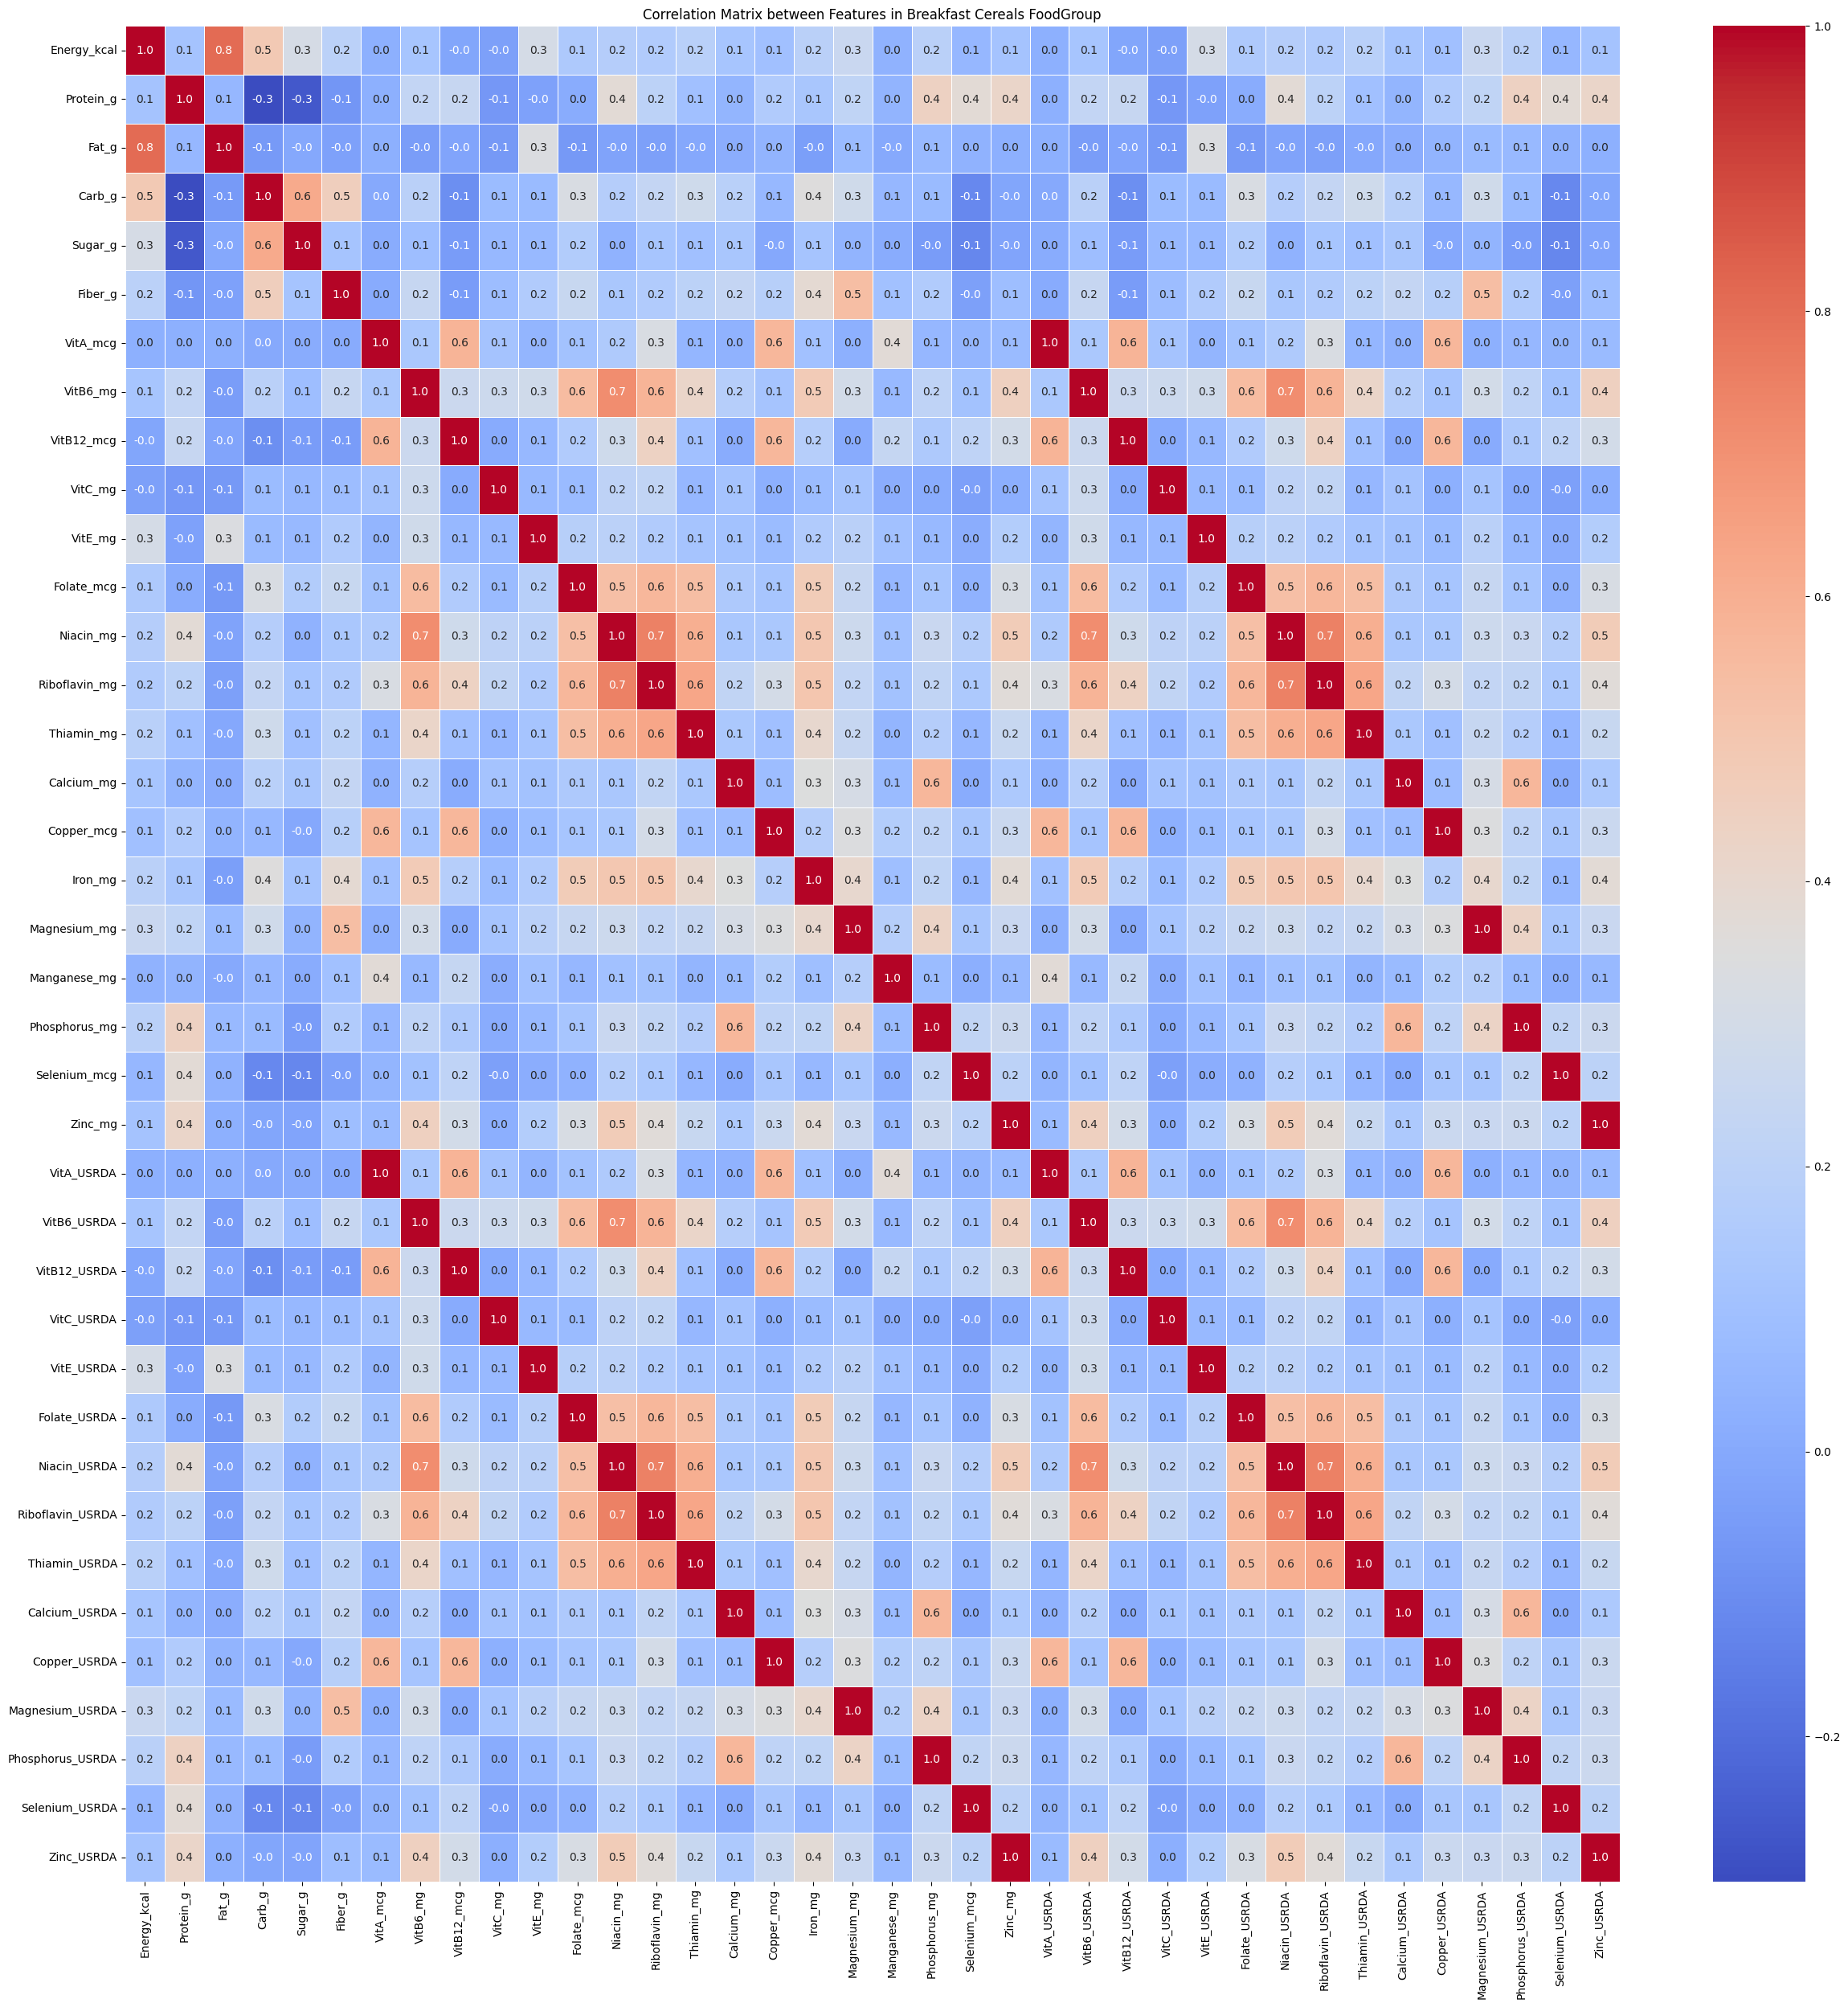

In [6]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(30, 30))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix between Features in Breakfast Cereals FoodGroup')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

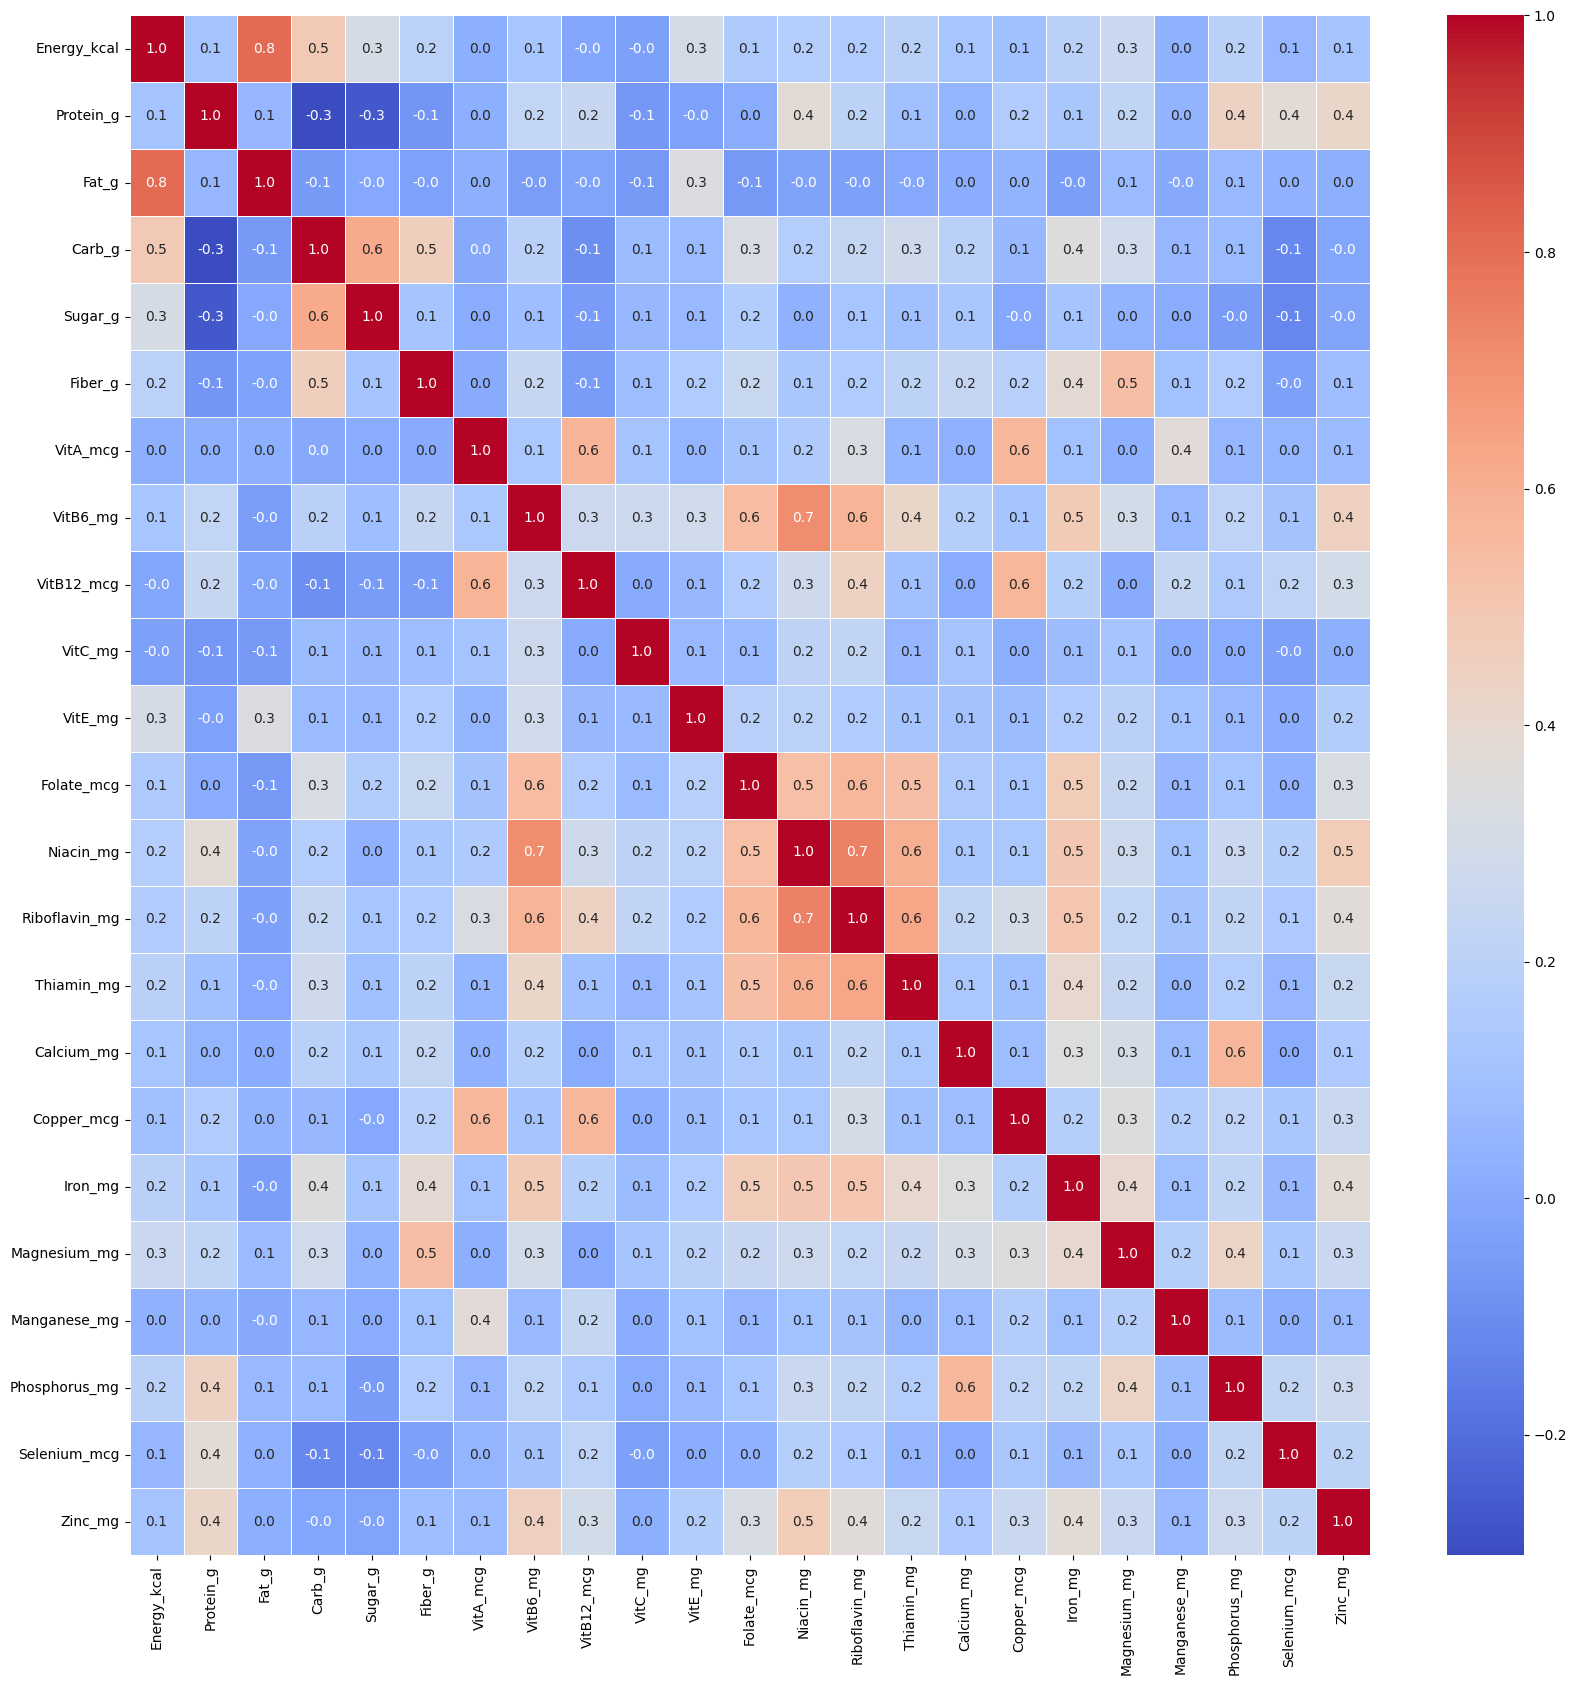

In [7]:
correlation_threshold = 0.9
redundant_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            redundant_features.add(colname)

data_reduced = numeric_data.drop(columns=redundant_features)
correlation_matrix_reduced = data_reduced.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

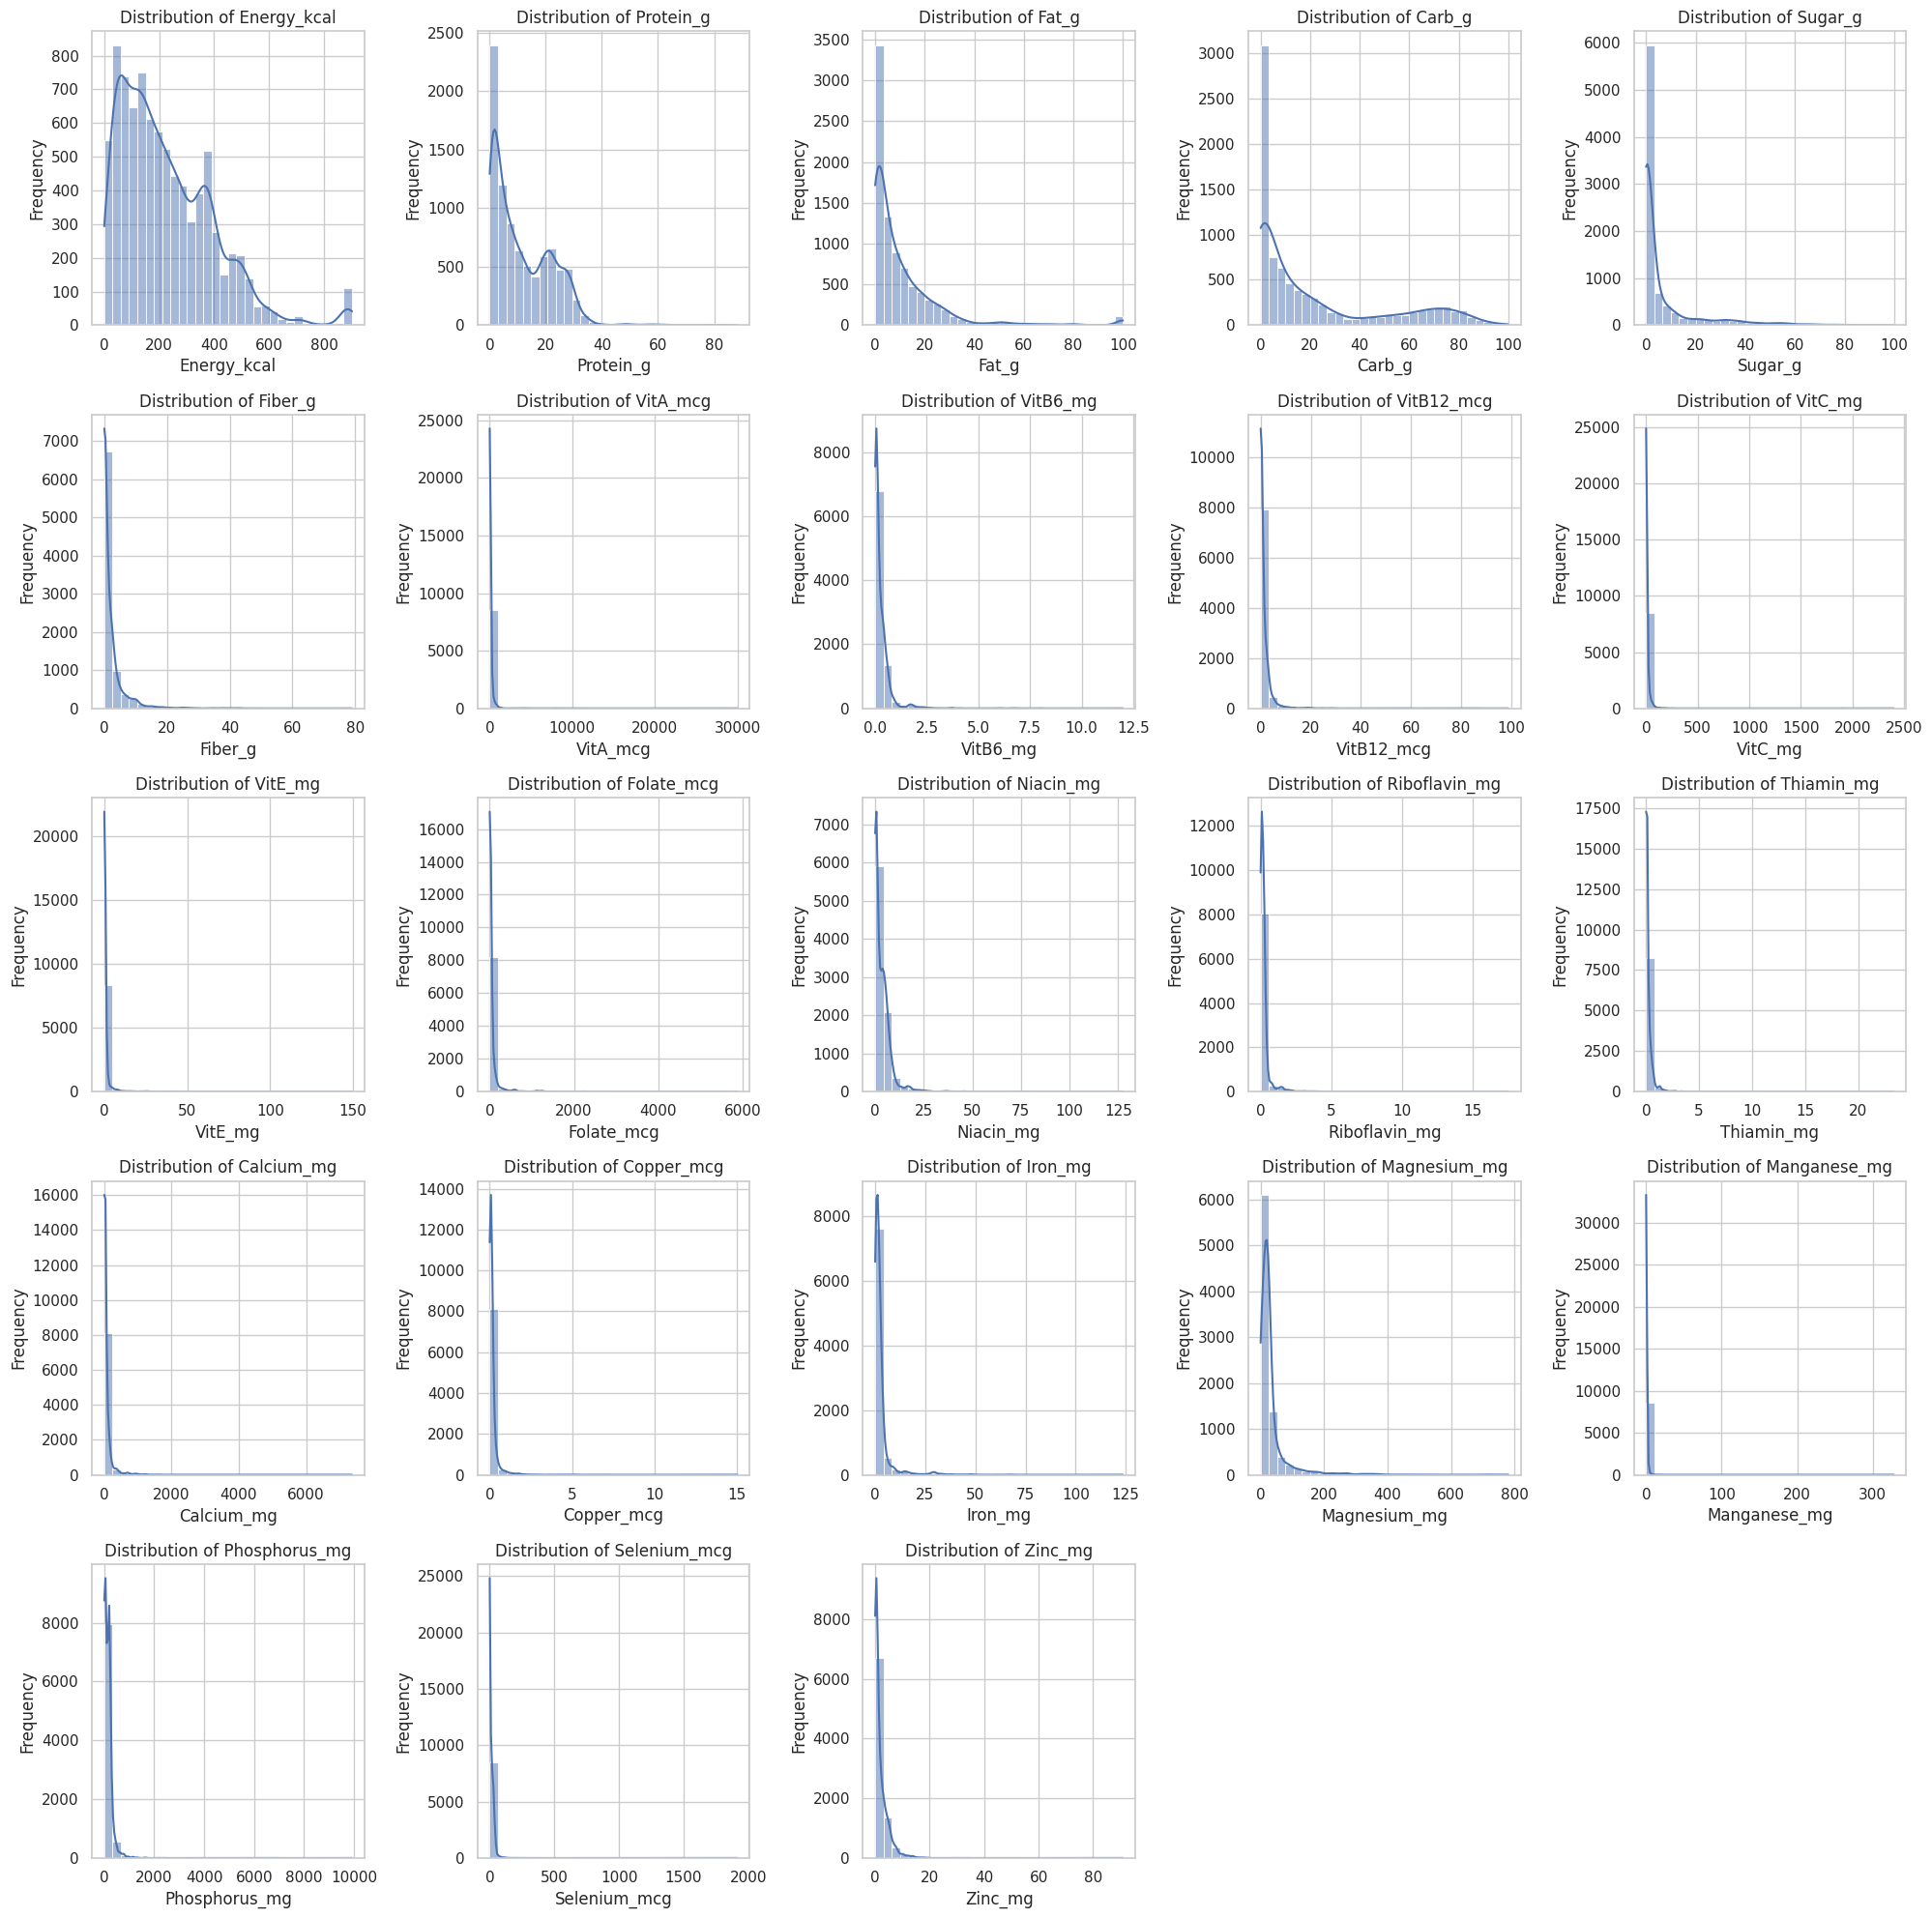

In [8]:
 sns.set(style='whitegrid')

num_columns = 5
num_rows = -(-len(data_reduced.columns) // num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(data_reduced.columns):
    sns.histplot(data_reduced[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [9]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
data_reduced = data_reduced + 1
df_boxcoxed = pd.DataFrame(index=data_reduced.index)

for i in data_reduced.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(data_reduced.loc[:, i])[0]

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

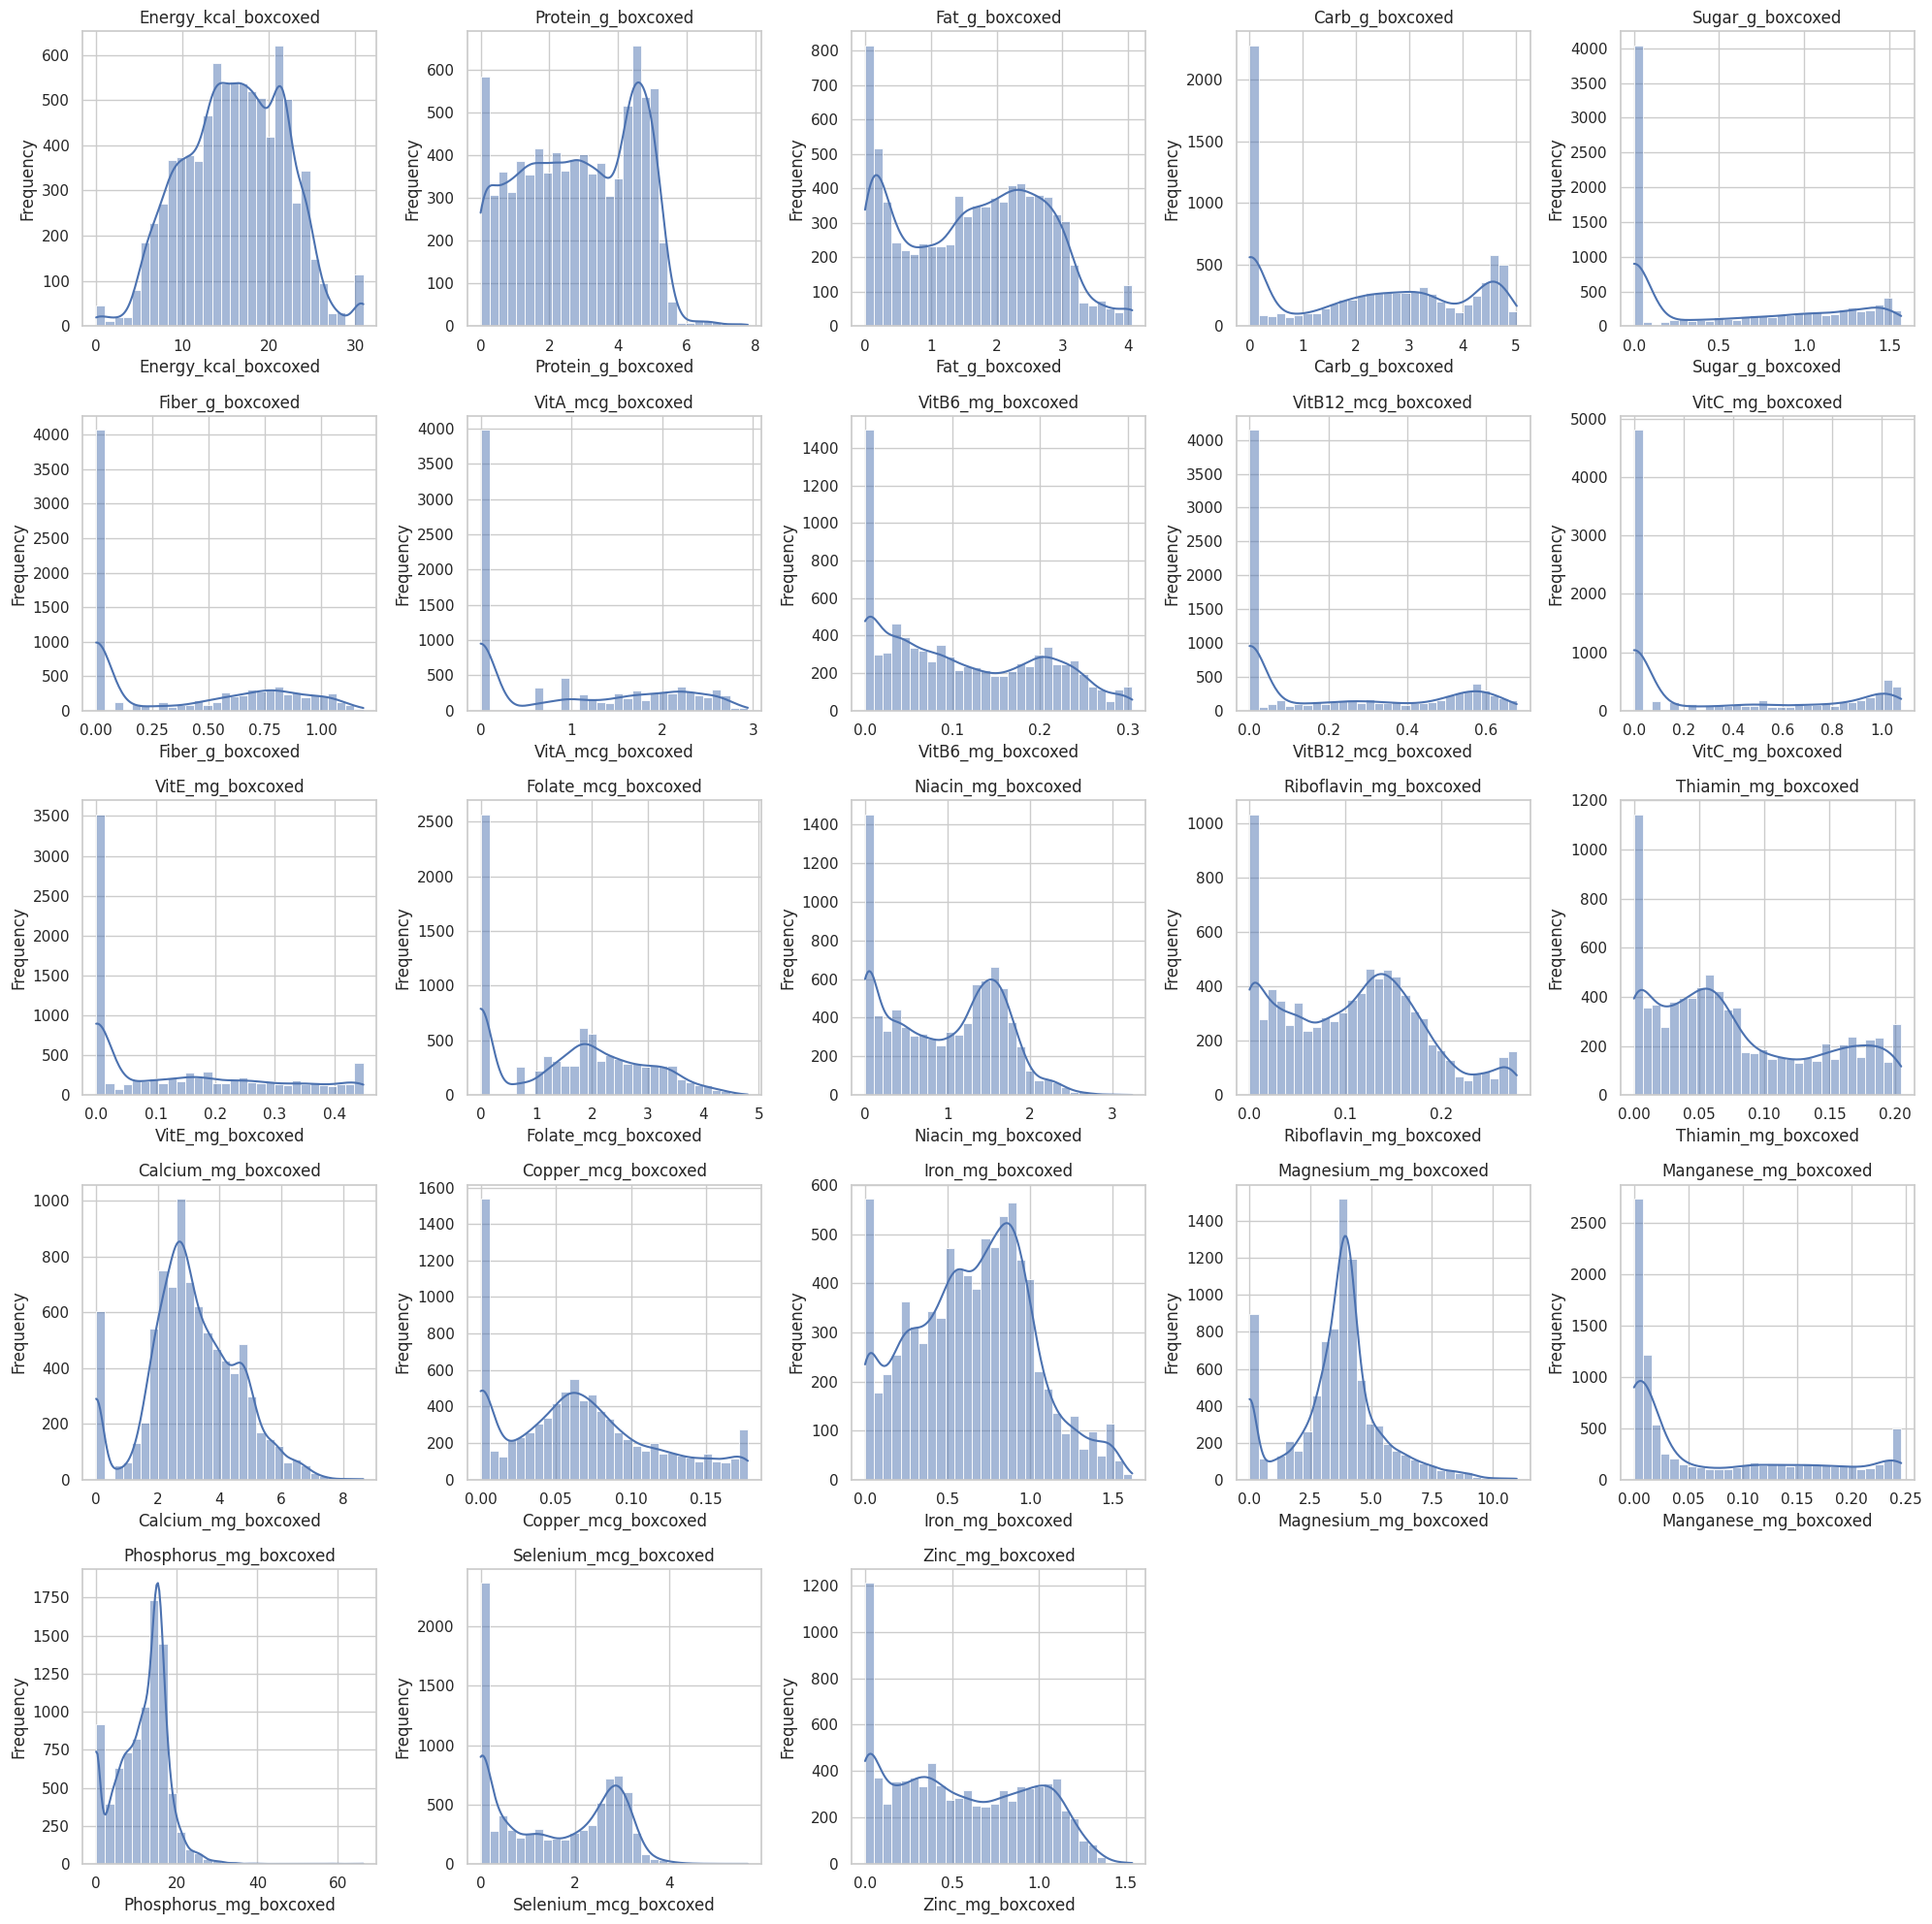

In [10]:
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_boxcoxed.columns):
    sns.histplot(df_boxcoxed[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [11]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_reduced)
standardized_data = pd.DataFrame(standardized_data, columns=data_reduced.columns)
print("Means of standardized features:\n", standardized_data.mean())
print("\nVariances of standardized features:\n", standardized_data.var())

Means of standardized features:
 Energy_kcal      5.153043e-18
Protein_g       -2.885704e-17
Fat_g            3.401008e-18
Carb_g          -1.739667e-16
Sugar_g         -2.555909e-17
Fiber_g         -2.473460e-17
VitA_mcg         4.122434e-19
VitB6_mg        -3.388641e-16
VitB12_mcg      -8.450990e-17
VitC_mg          8.657112e-18
VitE_mg         -4.287331e-17
Folate_mcg       9.893842e-18
Niacin_mg        6.637119e-17
Riboflavin_mg    1.780892e-16
Thiamin_mg      -2.531175e-16
Calcium_mg      -1.978768e-17
Copper_mcg      -1.578892e-16
Iron_mg          9.728944e-17
Magnesium_mg     4.452229e-17
Manganese_mg     2.968153e-17
Phosphorus_mg    7.997522e-17
Selenium_mcg    -1.319179e-17
Zinc_mg         -4.946921e-17
dtype: float64

Variances of standardized features:
 Energy_kcal      1.000116
Protein_g        1.000116
Fat_g            1.000116
Carb_g           1.000116
Sugar_g          1.000116
Fiber_g          1.000116
VitA_mcg         1.000116
VitB6_mg         1.000116
VitB12_mcg      

# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [12]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.components = eigenvectors[:, :self.n_components]
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [13]:
n_features = standardized_data.shape[1]
pca = CustomPCA(n_components=n_features)
pca.fit(standardized_data)
pca_result = pca.transform(standardized_data)

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


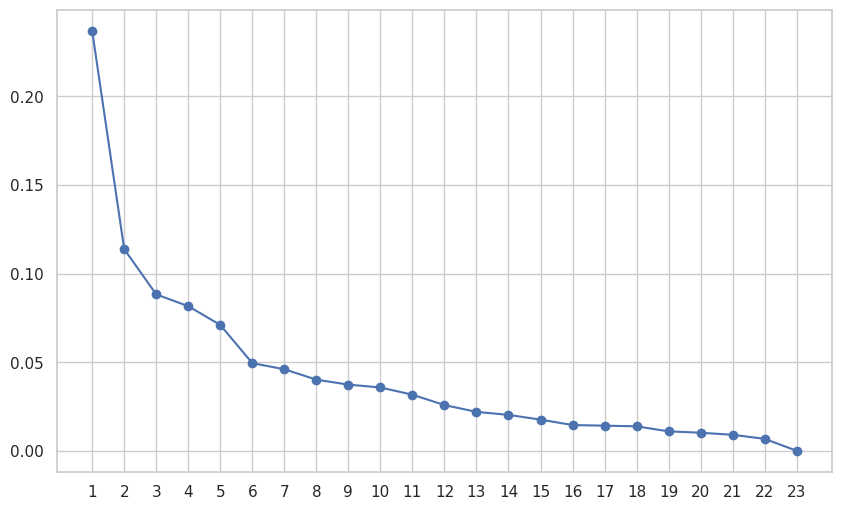

In [14]:
explained_variance_ratio = pca.get_explained_variance_ratio()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_features + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xticks(np.arange(1, n_features + 1))
plt.grid(True)
plt.show()

therefore we are going to pick 5 components

In [27]:
#print the total explained variance ration for the first 5 components
print(sum(explained_variance_ratio[:5]))

0.5919323716235942


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [16]:
pca_5 = CustomPCA(n_components=5)
pca_5.fit(standardized_data)
pca_5_res = pca_5.transform(standardized_data)
pca_5_res_df = pd.DataFrame(pca_5_res, columns=[f'PC{i}' for i in range(1, 6)])
pca_5_res_df['FoodGroup'] = data['FoodGroup']
pca_5_res_df.head()

,PC1,PC2,PC3,PC4,PC5,FoodGroup
0,-1.121776,-1.182251,3.661940,-1.080920,-3.084161,Dairy and Egg Products
1,-1.114687,-1.184173,3.662329,-1.090738,-3.077430,Dairy and Egg Products
2,-0.994919,-1.573580,4.697724,-1.317311,-3.912684,Dairy and Egg Products
3,0.235910,0.566070,1.905054,0.834509,0.438104,Dairy and Egg Products
4,0.300785,0.537659,2.307570,0.903853,0.875466,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [17]:
pca_5_res_df.drop(columns="FoodGroup").corr()

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000e+00,-3.409832e-16,1.997208e-16,-8.486831e-16,1.271041e-16
PC2,-3.409832e-16,1.000000e+00,-1.477856e-16,-3.193060e-17,-2.817082e-16
PC3,1.997208e-16,-1.477856e-16,1.000000e+00,-3.205089e-16,-5.102636e-17
PC4,-8.486831e-16,-3.193060e-17,-3.205089e-16,1.000000e+00,-7.080663e-17
PC5,1.271041e-16,-2.817082e-16,-5.102636e-17,-7.080663e-17,1.000000e+00


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

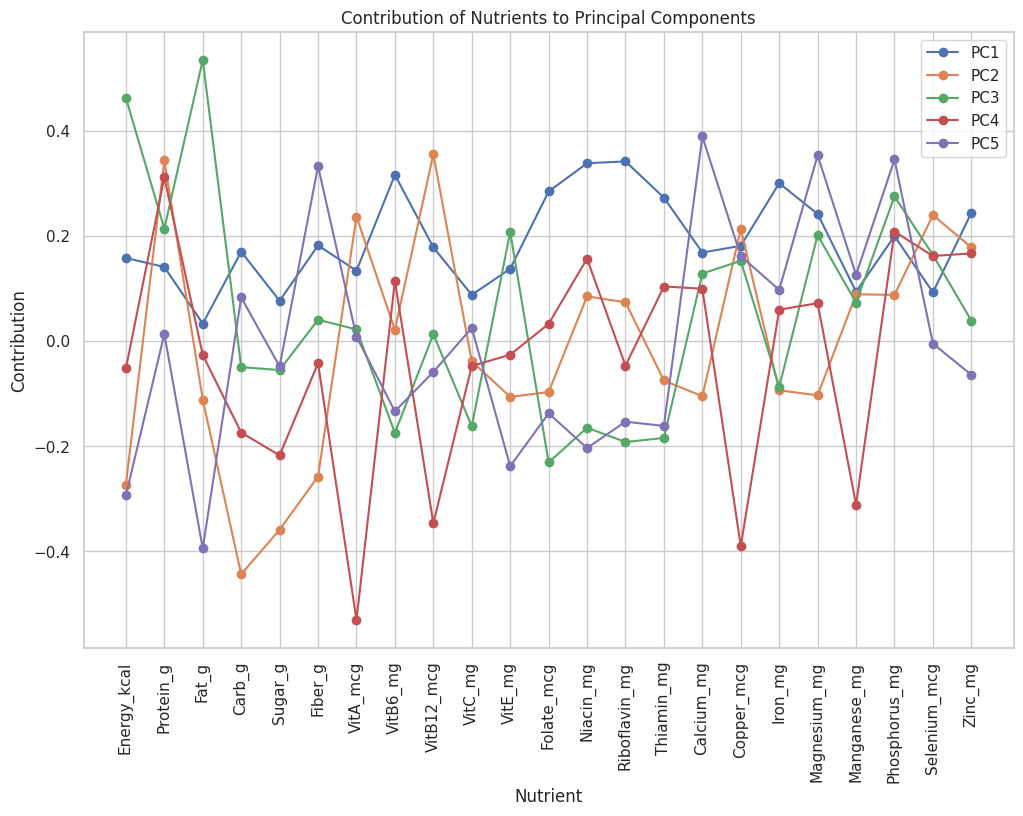

In [18]:
components = pca_5.get_components()
components_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(5)], index=data_reduced.columns)

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(components_df.index, components_df.iloc[:, i], marker='o', linestyle='-', label=f'PC{i+1}')

plt.title('Contribution of Nutrients to Principal Components')
plt.xlabel('Nutrient')
plt.ylabel('Contribution')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

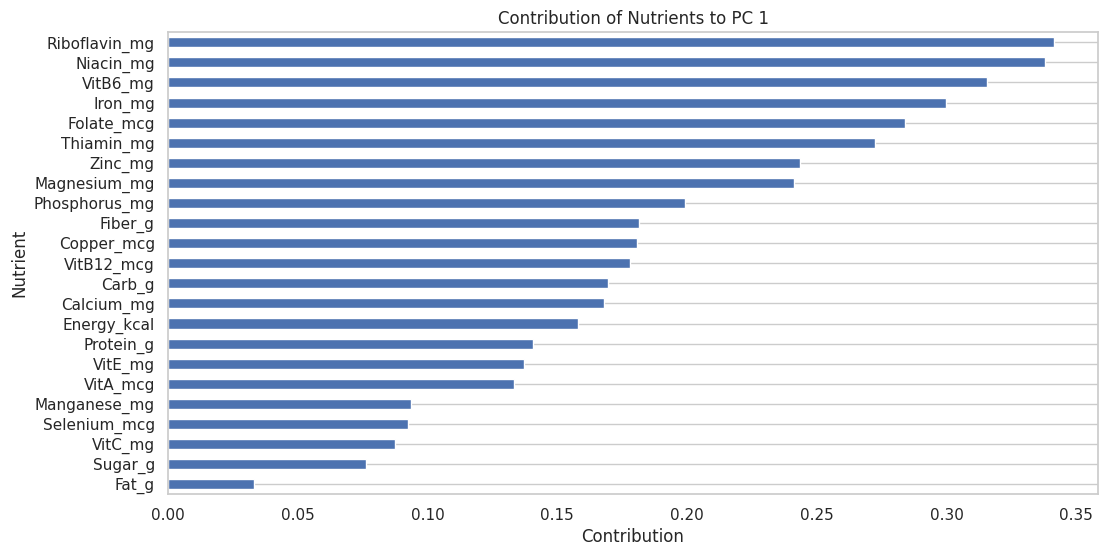

In [19]:
eigenvectors_df = pd.DataFrame(components, index=standardized_data.columns, columns=[f'PC{i}' for i in range(1, 6)])
plt.figure(figsize=(12, 6))
eigenvectors_df['PC1'].sort_values().plot(kind='barh')
plt.title('Contribution of Nutrients to PC 1')
plt.xlabel('Contribution')
plt.ylabel('Nutrient')
plt.grid(axis='x')
plt.show()

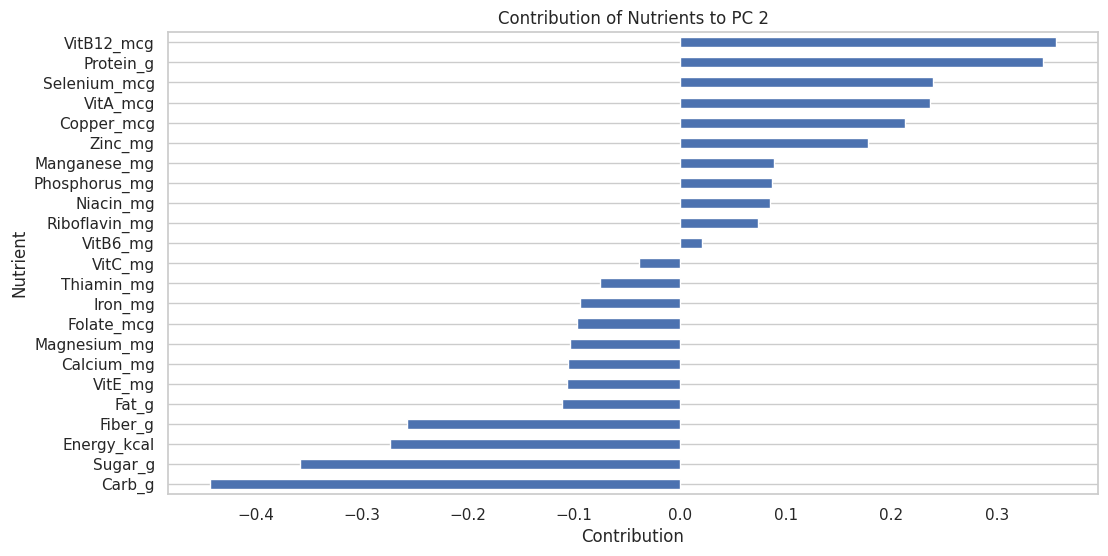

In [20]:
plt.figure(figsize=(12, 6))
eigenvectors_df['PC2'].sort_values().plot(kind='barh')
plt.title('Contribution of Nutrients to PC 2')
plt.xlabel('Contribution')
plt.ylabel('Nutrient')
plt.grid(axis='x')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">These plots illustrate the extent to which each principal component captures the variance in the data. We can observe that the first principal component (PC) encompasses a larger portion of the total variance (indicated by the area under its curve) compared to the second principal component. This is expected, as the first principal component is designed to capture the maximum possible variance..</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

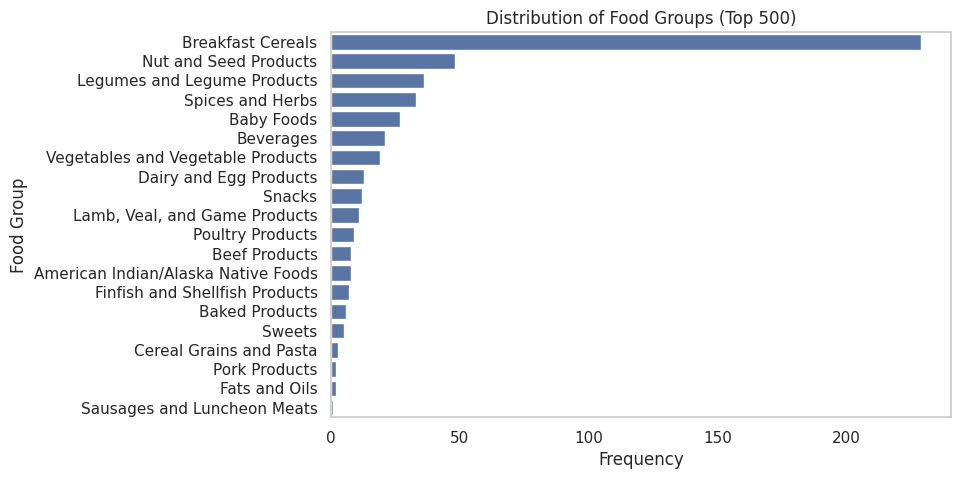

In [21]:
top_500 = pca_5_res_df.nlargest(500, 'PC1')

plt.figure(figsize=(8, 5))
sns.countplot(order=top_500['FoodGroup'].value_counts().index, y=top_500['FoodGroup'])
plt.title('Distribution of Food Groups (Top 500)')
plt.xlabel('Frequency')
plt.ylabel('Food Group')
plt.grid(axis='x')
plt.show()

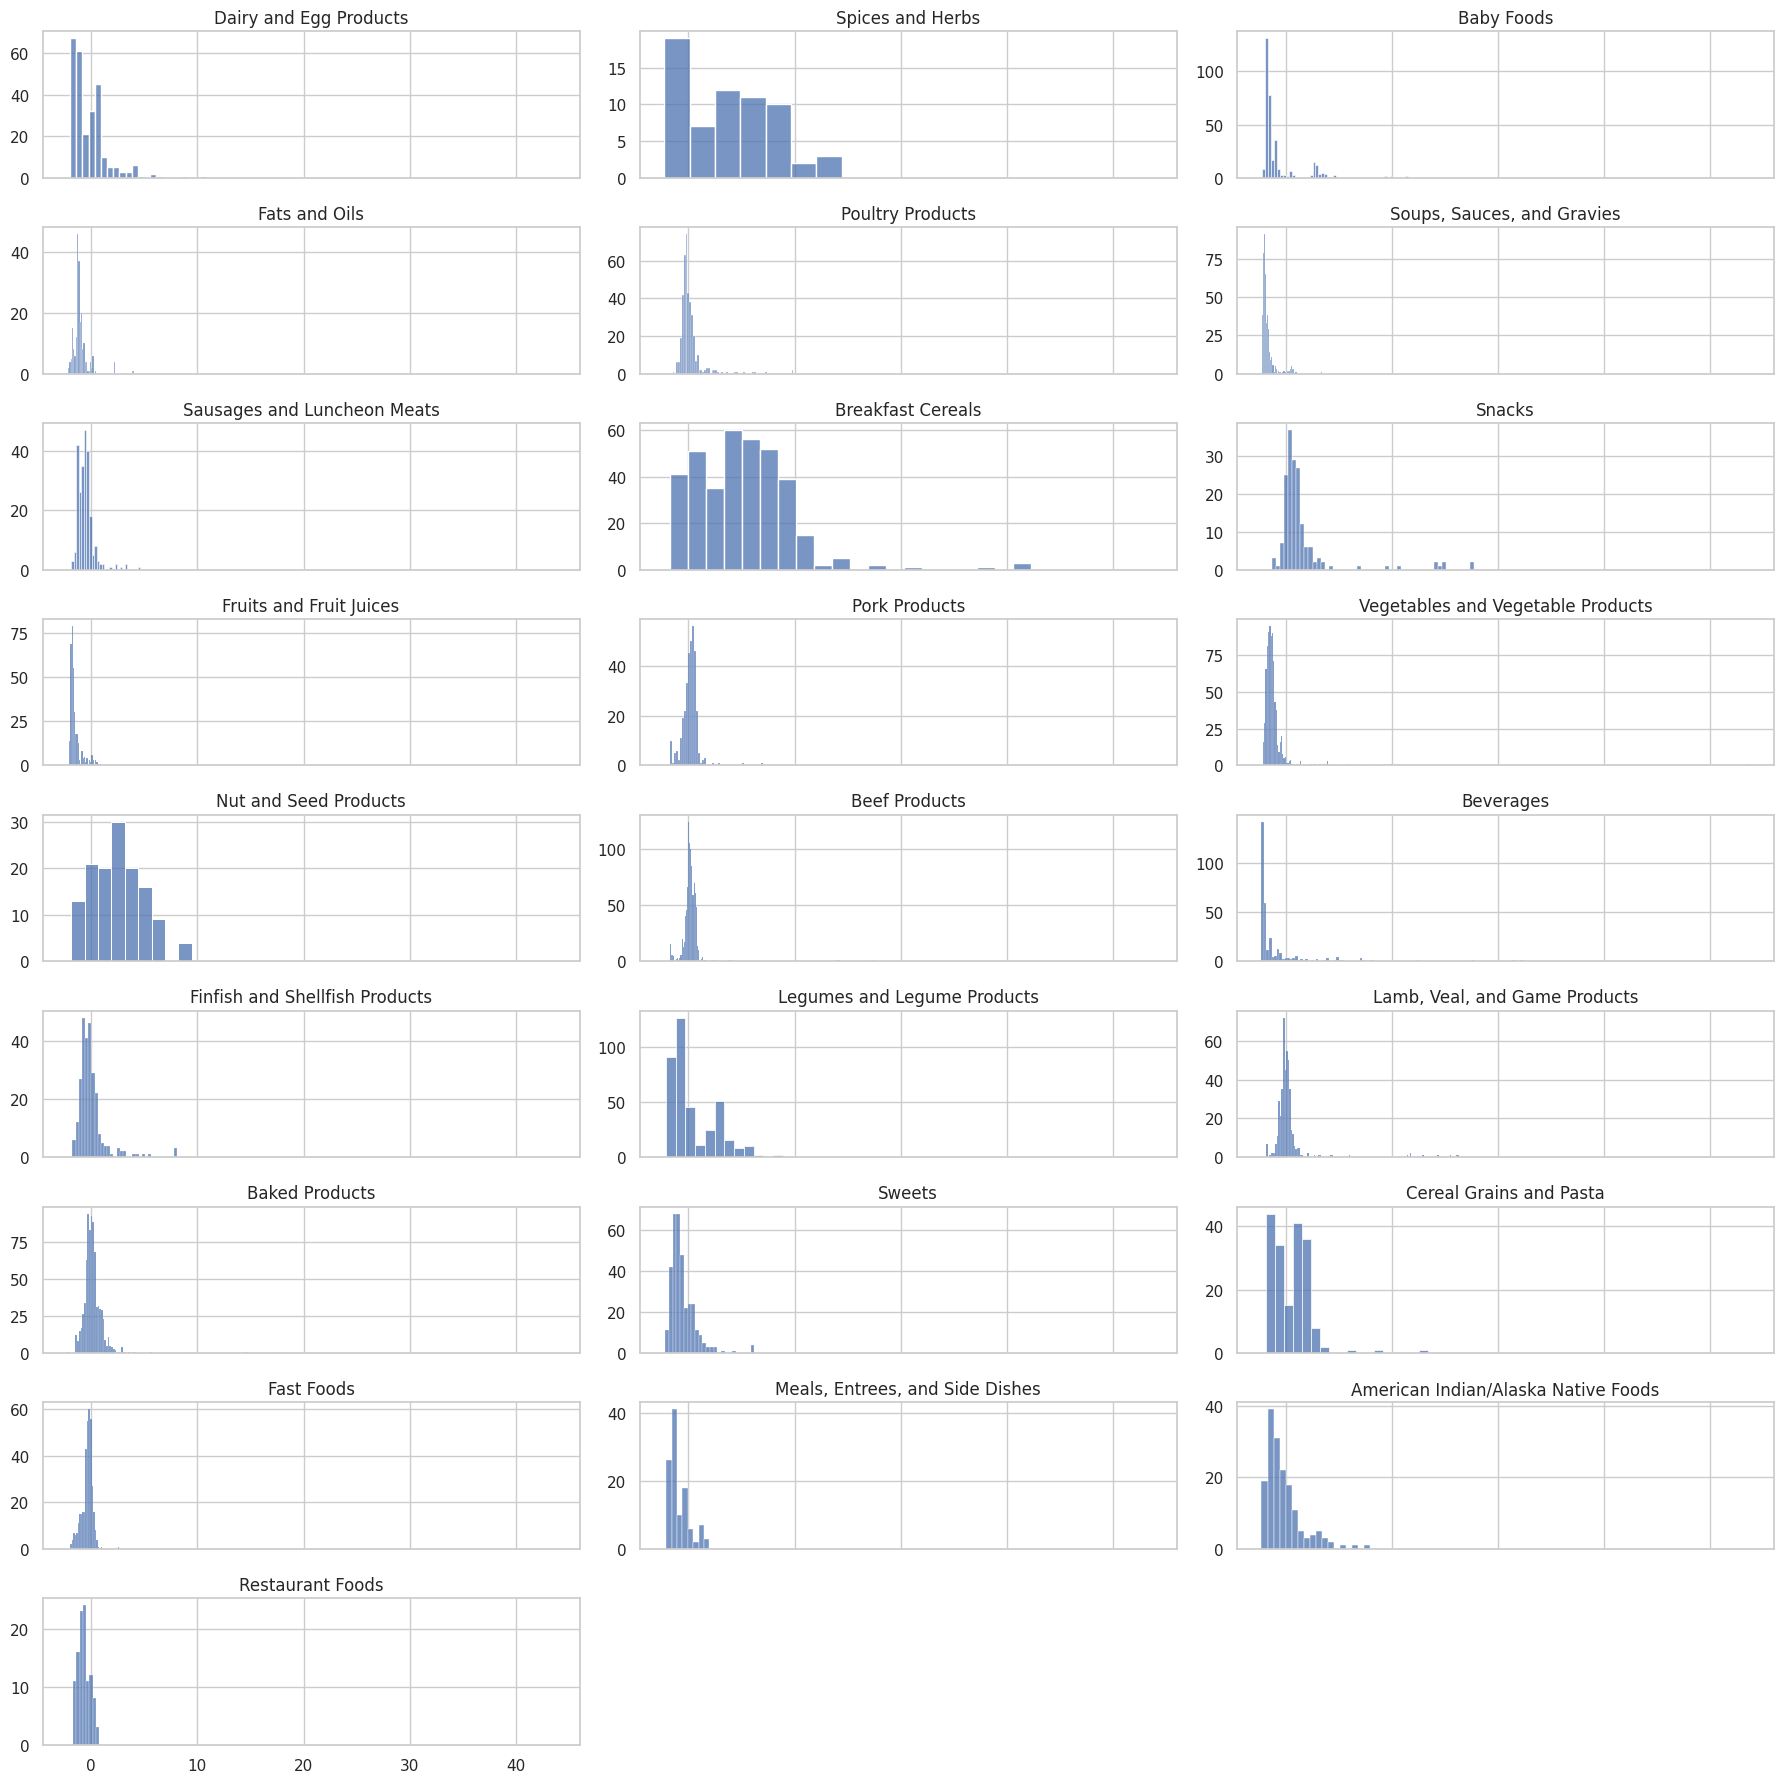

In [22]:
num_food_groups = pca_5_res_df['FoodGroup'].nunique()
num_cols = 3
num_rows = (num_food_groups + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 2 * num_rows), sharex=True)
axes = axes.flatten()

for i, food_group in enumerate(pca_5_res_df['FoodGroup'].unique()):
    sns.histplot(pca_5_res_df[pca_5_res_df['FoodGroup'] == food_group]['PC1'],
                 ax=axes[i])
    axes[i].set_title(food_group)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Do the same for pca2.

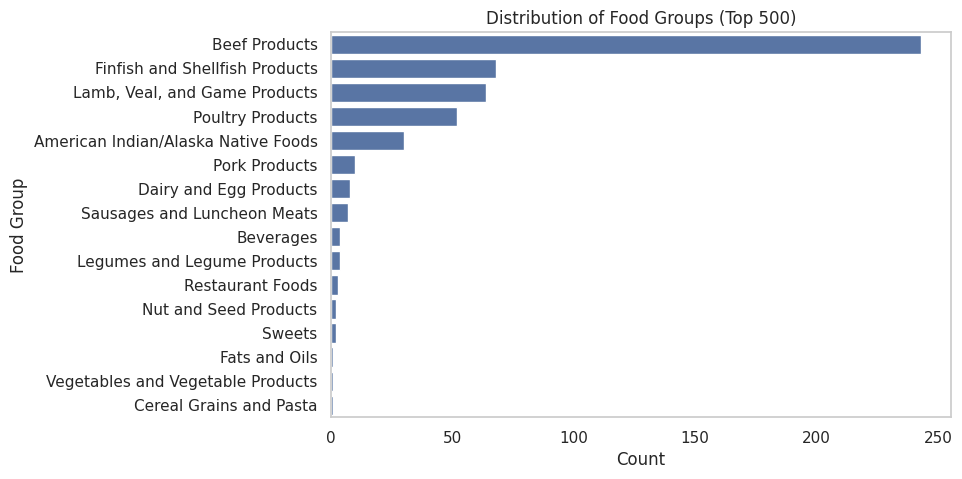

In [23]:
top_500 = pca_5_res_df.nlargest(500, 'PC2')

plt.figure(figsize=(8, 5))
sns.countplot(order=top_500['FoodGroup'].value_counts().index, y=top_500['FoodGroup'])
plt.title('Distribution of Food Groups (Top 500)')
plt.xlabel('Count')
plt.ylabel('Food Group')
plt.grid(axis='x')
plt.show()

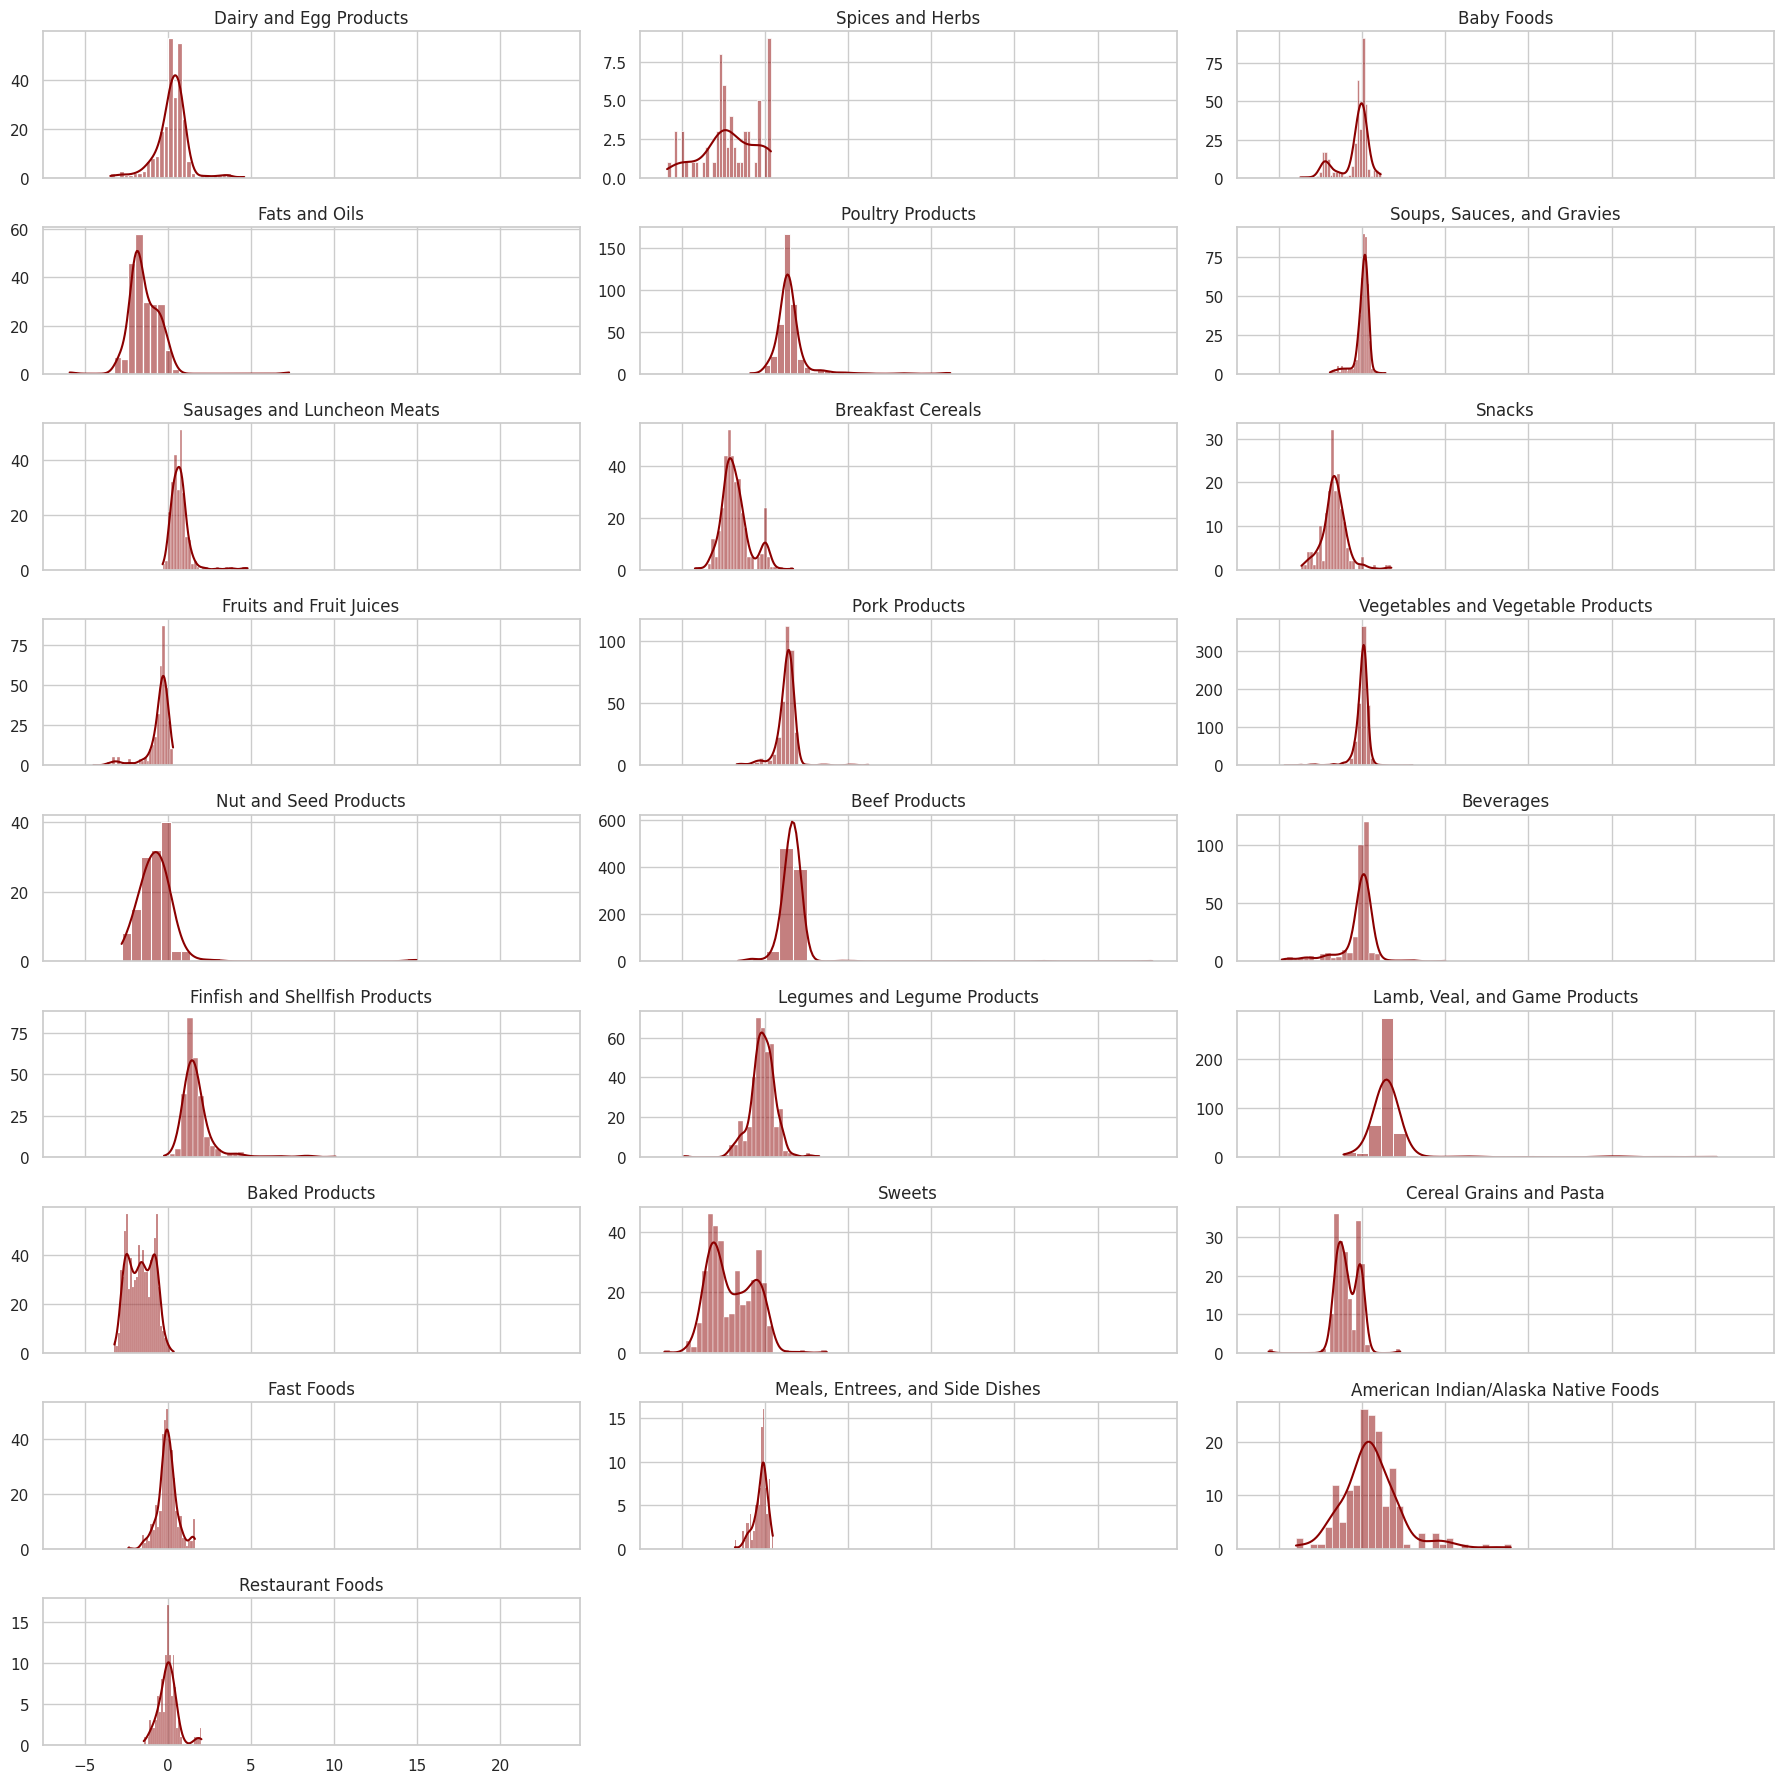

In [25]:
num_food_groups = pca_5_res_df['FoodGroup'].nunique()
num_cols = 3
num_rows = (num_food_groups + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 2 * num_rows), sharex=True)
axes = axes.flatten()

for i, food_group in enumerate(pca_5_res_df['FoodGroup'].unique()):
    sns.histplot(pca_5_res_df[pca_5_res_df['FoodGroup'] == food_group]['PC2'],
                 ax=axes[i], bins=30, kde=True, edgecolor=None, color='darkred')
    axes[i].set_title(food_group)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


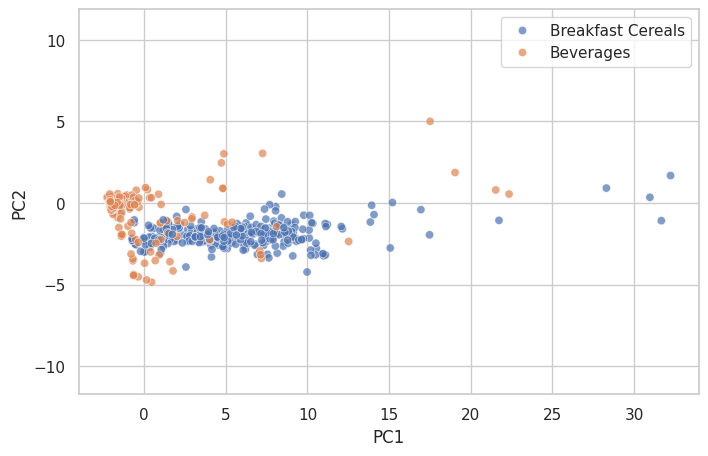

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(pca_5_res_df[pca_5_res_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])],
                x='PC1', y='PC2', hue='FoodGroup', alpha=0.7)
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">We can identify the most influential food groups that impact the target value through these plots. Notably, the first and second principal components (PCs) are uncorrelated, as evidenced by their distinct significant food groups.</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Since most of the foods considered in PC1 are breakfast cereals, this specific pattern is evident in the plot grid. The area under the curve corresponds to the hierarchy seen in the distribution plot, indicating this correlation.</span>

